# Cells Notebook (for Colab People)

In [3]:
# This downloads the plant cells image onto google drive
!wget https://raw.githubusercontent.com/ursinus-cs371-s2022/HW2_PlantCellSegmentation/main/Cells.jpg

zsh:1: command not found: wget


In [4]:
!pip install scikit-image

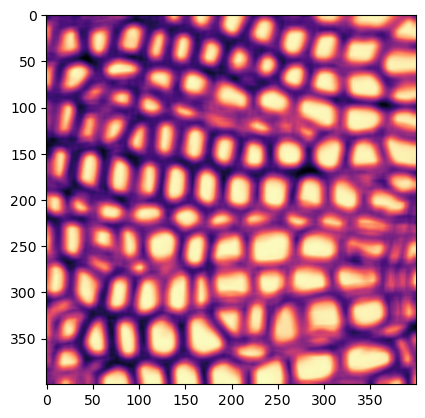

In [2]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import skimage.io
from skimage.transform import resize
from skimage.color import rgb2gray
import time

def load_cells_grayscale(filename, n_pixels = 0):
    """
    Load in a grayscale image of the cells, where 1 is maximum brightness
    and 0 is minimum brightness
    Parameters
    ----------
    filename: string
        Path to image holding the cells
    n_pixels: int
        Number of pixels in the image
    
    Returns
    -------
    ndarray(N, N)
        A square grayscale image
    """
    cells_original = skimage.io.imread(filename)
    cells_gray = rgb2gray(cells_original)
    # Denoise a bit with a uniform filter
    cells_gray = ndimage.uniform_filter(cells_gray, size=10)
    cells_gray = cells_gray - np.min(cells_gray)
    cells_gray = cells_gray/np.max(cells_gray)
    N = int(np.sqrt(n_pixels))
    if n_pixels > 0:
        # Resize to a square image
        cells_gray = resize(cells_gray, (N, N), anti_aliasing=True)
    return cells_gray


def permute_labels(labels):
    """
    Shuffle around labels by raising them to a prime and
    modding by a large-ish prime, so that cells are easier
    to see against their backround
    Parameters
    ----------
    labels: ndarray(M, N)
        An array of labels for the pixels in the image
    Returns
    -------
    labels_shuffled: ndarray(M, N)
        A new image where the labels are different but still
        the same within connected components
    """
    return (labels**31) % 833


## TODO: Fill in your code here

if __name__ == '__main__':
    I = load_cells_grayscale("Cells.jpg")
    plt.imshow(I, cmap='magma')
    plt.show()